In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from keras import backend as K 
from keras.models import Sequential, model_from_json, load_model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

# public test: data 28711 to 32299

Using TensorFlow backend.


In [0]:
# data set downloaded from 
# https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data
filename = 'drive/My Drive/Colab Notebooks/fer2013.csv'
titles = ['emotion','pixels','usage']

# note that the given dataset in csv file contains train, test and validation sets
# total number of images = 35887
# write data from csv file to X and Y 
# we also need to skip first line of the file which only contains title
def transformData(filename):
    X = []
    Y = []
    with open(filename) as f:
        # skip first line in file
        next(f)
        for line in f:
            # each line contains:
            # 0. emotional category (0 to 6), 
            # 1. pixels of the image
            # 2. whethere it belongs to test, train or validation sets
            # we will split train and test sets later on our own
            pixels = line.split(',')[1]
            emotion = int(line.split(',')[0])
            # we want to input a list of length=7 which will represent
            # the true category with 1 at its corresponding index
            # and 0 at all other indices
            # eg. an image belongs to Disgust, which has index 1,
            # thus its Y label will be [0., 1., 0., 0., 0., 0., 0.]
            emotion_extend = np.zeros(7)
            emotion_extend[emotion] = 1
            Y.append(emotion_extend)
            X.append([int(p) for p in pixels.split()])

    # convert X, Y to numpy array
    X = np.array(X)
    Y = np.array(Y)
    # convert input to 48x48 grayscale images
    X = X.reshape(X.shape[0], 48, 48, 1)
    return X / 255.0, Y

In [5]:
# create X and Y data sets and verify that there are 7 classes/emotions
X, Y = transformData(filename)
print(X.shape, Y.shape)

# split dataset into train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print(Y_train.shape)
print(Y_train) 

(35887, 48, 48, 1) (35887, 7)
(32298, 7)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [8]:
# create new CNN model
model = Sequential()
input_shape = (48,48,1)
model.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

# flatten the model
model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# output layer, number of classes = 7
model.add(Dense(7, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')

# print(model.summary)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 32298 samples, validate on 3589 samples
Epoch 1/40
32298/32298 [==============================] - 29s 906us/step - loss: 1.9580 - acc: 0.2323 - val_loss: 1.8341 - val_acc: 0.2731

Epoch 00001: loss improved from inf to 1.95803, saving model to weights19.01-0.27.h5
Epoch 2/40
32298/32298 [==============================] - 24s 736us/step - loss: 1.6390 - acc: 0.3546 - val_loss: 1.5707 - val_acc: 0.4046

Epoch 00002: loss improved from 1.95803 to 1.63898, saving model to weights19.02-0.40.h5
Epoch 3/40
32298/32298 [==============================] - 24s 737us/step - loss: 1.4417 - acc: 0.4423 - val_loss: 1.2695 - val_acc: 0.5054

Epoch 00003: loss improved from 1.63898 to 1.44171, saving model to weights19.03-0.51.h5
Epoch 4/40
32298/32298 [==============================] - 24s 751us/step - loss: 1.3345 - acc: 0.4873 - val_loss: 1.2086 - val_acc: 0.5344

Epoch 00004: loss improved from 

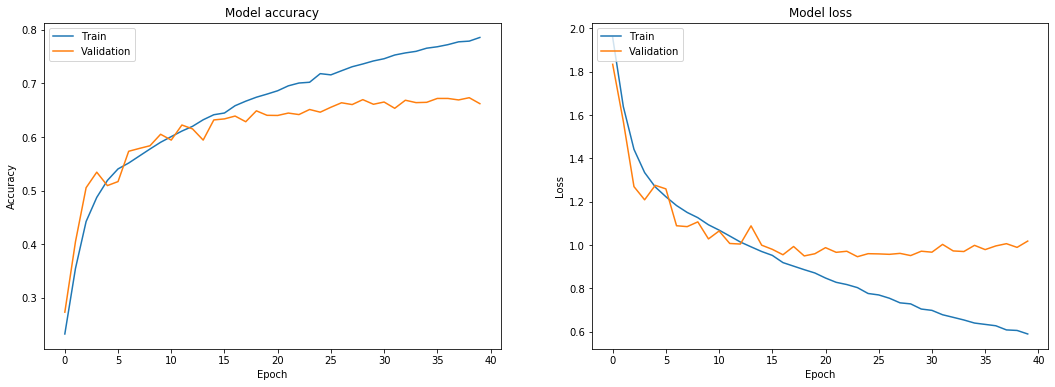

CNN Model Accuracy on test set: 0.6623


In [9]:
# save the model params and weights after each epoch
path_model='weights19.{epoch:02d}-{val_acc:.2f}.h5'
callbacks = ModelCheckpoint(filepath = path_model,monitor='loss', verbose=1, save_best_only=True,)
callback_list = [callbacks]
# set learning rate in optimizer
K.set_value(model.optimizer.lr,7e-4)
epoch = 40
# fit the model
history = model.fit(x=X_train,     
            y=Y_train, 
            batch_size=50, 
            epochs=epoch, 
            verbose=1, 
            validation_data=(X_test, Y_test),
            shuffle=True,
            callbacks=callback_list
            )

# visualizing training process
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['acc'])
axes[0].plot(history.history['val_acc']) 
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

# predict on test set and calculating accuracy
test_true = np.argmax(Y_test, axis=1)
test_pred = np.argmax(model.predict(X_test), axis=1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

Predicted emotion: Sad
True emotion: Sad


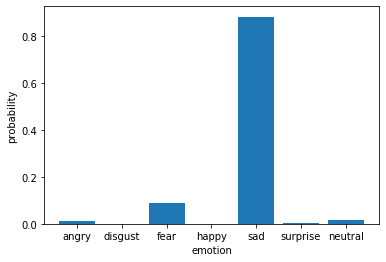

Predicted emotion: Fear
True emotion: Fear


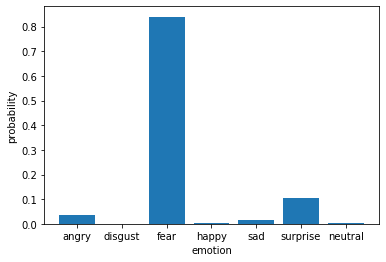

Predicted emotion: Sad
True emotion: Sad


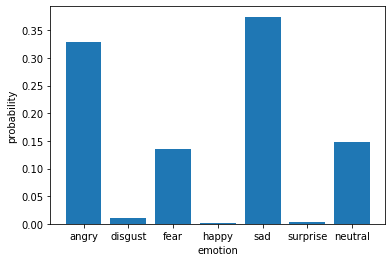

Predicted emotion: Anger
True emotion: Anger


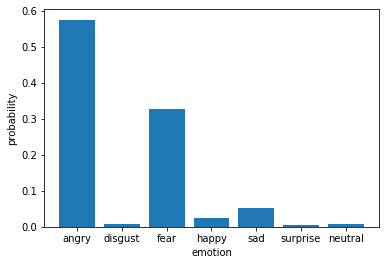

Predicted emotion: Neutral
True emotion: Neutral


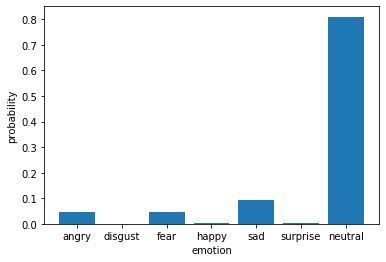

In [10]:
# helper function from https://www.kaggle.com/shawon10/facial-expression-detection-cnn
# generate a bar plot for emotion analysis
def get_emotion(predictions):
    labels = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    x_axis = np.arange(7)
    plt.bar(x_axis, predictions)
    plt.xticks(x_axis, labels)
    plt.ylabel('probability')
    plt.xlabel('emotion')
    plt.show()

# test and print emotion predictions using first 3 test data
pred = model.predict(X_test[1:6])
label_list = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
for i in range(5):
  max_pred = np.argmax(pred[i])
  print("Predicted emotion: {}".format(label_list[max_pred]))
  print("True emotion: {}".format(label_list[test_true[i+1]]))
  get_emotion(pred[i])

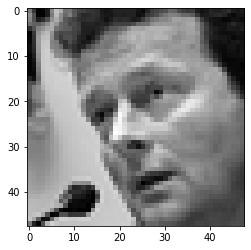

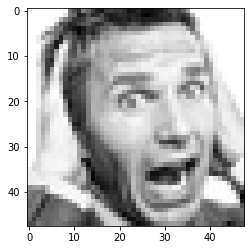

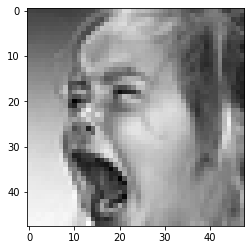

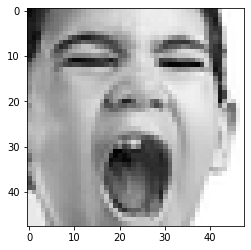

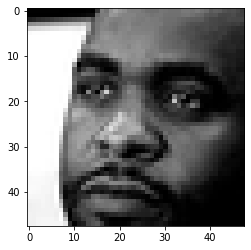

In [11]:
# show a grayscale test image
for i in range(1, 6):
  plt.imshow(X_test[i].squeeze(),cmap = 'gray')
  plt.show()

In [0]:
# load trained model and reuse it to predict
model = load_model('weights11.07-0.61.h5')
# summarize model.
model.summary()
test_true = np.argmax(Y_test, axis=1)
test_pred = np.argmax(model.predict(X_test), axis = 1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      